Import Libraries

In [98]:
import pandas as pd
import numpy as np

#### 1. Data Collection 

In [99]:
df = pd.read_csv('sensor_data.csv')

In [100]:
df.head()

,Timestamp,Boiler Name,Temperature,Anomaly
0,2023-01-23 00:58:20,Boiler A,20.180428,0
1,2023-01-30 06:30:08,Boiler A,23.372948,0
2,2023-01-03 10:47:23,Boiler A,29.858208,0
3,2023-01-03 17:10:50,Boiler C,20.564032,0
4,2023-01-04 17:50:22,Boiler D,23.547024,0


In [101]:
df.isnull().sum()

Timestamp      0
Boiler Name    0
Temperature    0
Anomaly        0
dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    1000 non-null   object 
 1   Boiler Name  1000 non-null   object 
 2   Temperature  1000 non-null   float64
 3   Anomaly      1000 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


#### 2. Data Preprocessing

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df.describe()

,Temperature,Anomaly
count,1000.000000,1000.000000
mean,25.795237,0.024000
std,8.206830,0.153126
min,1.793127,0.000000
25%,21.847202,0.000000
50%,25.120639,0.000000
75%,28.567648,0.000000
max,94.007501,1.000000


<Axes: xlabel='Temperature', ylabel='Count'>

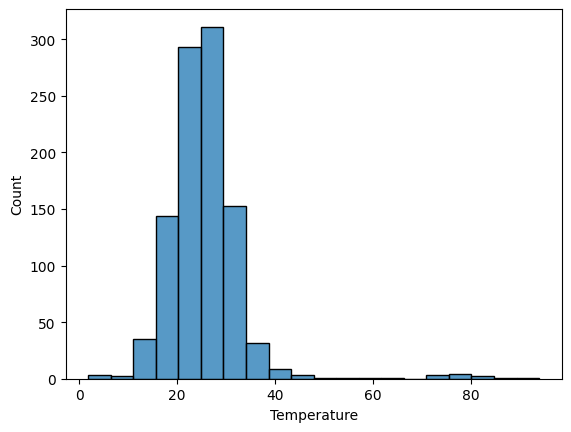

In [105]:
sns.histplot(x='Temperature', data=df, bins=20, )

In [106]:
timstamps = pd.to_datetime(df['Timestamp'])

In [107]:
numerical_timestamps  = timstamps.astype(np.int64) // 10**9

In [108]:
numerical_timestamps

0      1674435500
1      1675060208
2      1672742843
3      1672765850
4      1672854622
          ...    
995    1673480384
996    1674609741
997    1672631271
998    1673083282
999    1672558641
Name: Timestamp, Length: 1000, dtype: int64

In [109]:
# Calculate mean and standard deviation
mean = numerical_timestamps.mean()
std_dev = numerical_timestamps.std()

# Define threshold (e.g., 3 standard deviations from the mean)
threshold = 3 * std_dev

# Identify outliers
outliers = timstamps[abs(numerical_timestamps - mean) > threshold]

print("Outliers:")
print(outliers)

Outliers:
Series([], Name: Timestamp, dtype: datetime64[ns])


In [110]:
df['Timestamp']  = pd.to_datetime(df['Timestamp'])

#### 3. Exploratory Data Analysis

In [111]:
df

,Timestamp,Boiler Name,Temperature,Anomaly
0,2023-01-23 00:58:20,Boiler A,20.180428,0
1,2023-01-30 06:30:08,Boiler A,23.372948,0
2,2023-01-03 10:47:23,Boiler A,29.858208,0
3,2023-01-03 17:10:50,Boiler C,20.564032,0
4,2023-01-04 17:50:22,Boiler D,23.547024,0
...,...,...,...,...
995,2023-01-11 23:39:44,Boiler A,27.596447,0
996,2023-01-25 01:22:21,Boiler B,19.189359,0
997,2023-01-02 03:47:51,Boiler A,17.157156,0
998,2023-01-07 09:21:22,Boiler B,23.135241,0


In [112]:
df['Anomaly'].value_counts()

Anomaly
0    976
1     24
Name: count, dtype: int64

Class imbalance problem. Should use techniques like SMOTE etc.

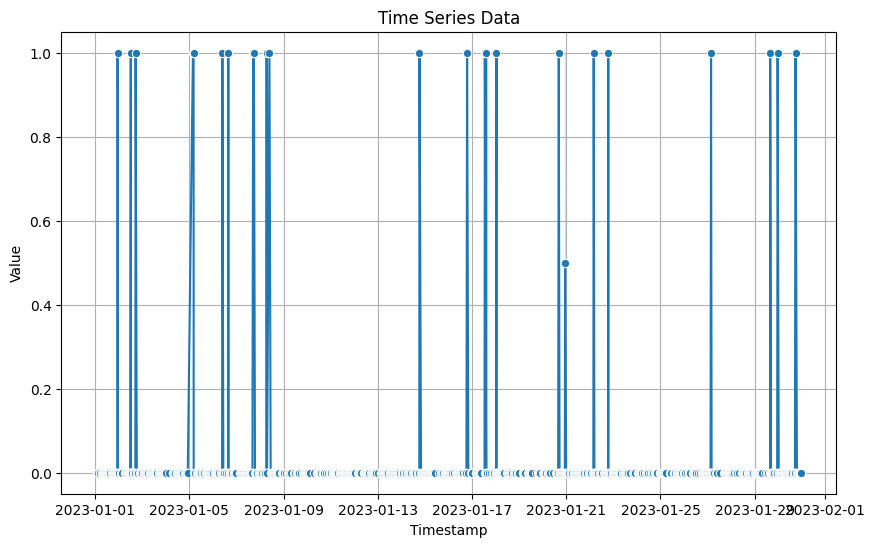

In [113]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Timestamp', y='Anomaly', marker='o')
plt.title('Time Series Data')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [115]:
df['Timestamp_day'] = df['Timestamp'].dt.day

In [116]:
df['Timestamp_Weekday'] = df['Timestamp'].dt.day_name()

In [117]:
df

,Timestamp,Boiler Name,Temperature,Anomaly,Timestamp_day,Timestamp_Weekday
0,2023-01-23 00:58:20,Boiler A,20.180428,0,23,Monday
1,2023-01-30 06:30:08,Boiler A,23.372948,0,30,Monday
2,2023-01-03 10:47:23,Boiler A,29.858208,0,3,Tuesday
3,2023-01-03 17:10:50,Boiler C,20.564032,0,3,Tuesday
4,2023-01-04 17:50:22,Boiler D,23.547024,0,4,Wednesday
...,...,...,...,...,...,...
995,2023-01-11 23:39:44,Boiler A,27.596447,0,11,Wednesday
996,2023-01-25 01:22:21,Boiler B,19.189359,0,25,Wednesday
997,2023-01-02 03:47:51,Boiler A,17.157156,0,2,Monday
998,2023-01-07 09:21:22,Boiler B,23.135241,0,7,Saturday


In [118]:
# Define time ranges and corresponding categories
time_bins = [0, 6, 12, 18, 24]
time_labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Use cut() to categorize time into bins
df['Timestamp_category'] = pd.cut(df['Timestamp'].dt.hour, bins=time_bins, labels=time_labels, right=False)


In [122]:
df = df.drop(columns=['Timestamp', 'Timestamp_day'])

In [123]:
df = pd.get_dummies(df)

In [125]:
df.head().T

,0,1,2,3,4
Temperature,20.180428,23.372948,29.858208,20.564032,23.547024
Anomaly,0,0,0,0,0
Boiler Name_Boiler A,True,True,True,False,False
Boiler Name_Boiler B,False,False,False,False,False
Boiler Name_Boiler C,False,False,False,True,False
Boiler Name_Boiler D,False,False,False,False,True
Timestamp_Weekday_Friday,False,False,False,False,False
Timestamp_Weekday_Monday,True,True,False,False,False
Timestamp_Weekday_Saturday,False,False,False,False,False
Timestamp_Weekday_Sunday,False,False,False,False,False


In [126]:
X = df.drop('Anomaly', axis=1)
y = df[['Anomaly']]

In [150]:
df['Anomaly'].value_counts()

Anomaly
0    976
1     24
Name: count, dtype: int64

In [127]:
from imblearn.over_sampling import SMOTE

In [129]:
# Applying SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [130]:
X_resampled.shape

(1952, 16)

In [151]:
y_resampled.shape

(1952, 1)

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

In [153]:
y_train.shape

(1464,)

In [154]:
y_test.shape

(488, 1)

In [140]:
y_train = y_train.to_numpy().ravel()

In [137]:
model = RandomForestClassifier()

In [141]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [142]:
y_pred = model.predict(X_test)

In [145]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [148]:
accuracy_score(y_test, y_pred)

1.0

In [149]:
classification_report(y_test, y_pred, target_names=['Yes', 'No'], output_dict=True)

{'Yes': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 246.0},
 'No': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 242.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 488.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 488.0}}

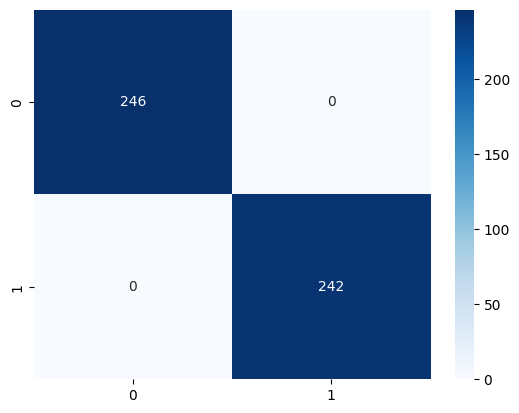

In [158]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show()